In [88]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

ModuleNotFoundError: No module named 'hilbert_curve'

### Keypoint Detection

In [84]:
img_index = '0020'
img1 = cv.imread(f'../caltech-101/segmented_images/airplanes/{img_index}.jpg')
mask = cv.imread(f'../caltech-101/masks/airplanes/{img_index}.jpg', cv.IMREAD_GRAYSCALE)

In [85]:
# find the keypoints with SIFT detector 
sift = cv.SIFT_create()
kp1 = sift.detect(img1, mask)

# sort keypoints by size
sorted_kp = sorted(kp1, key = lambda x: x.size, reverse=True)

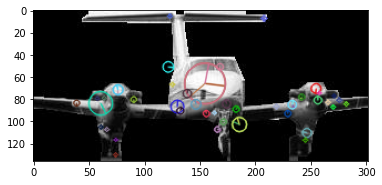

In [87]:
# draw top keypoint on image
out1 = np.empty((img1.shape[0], img1.shape[1], 3), dtype=np.uint8)
img_keypoints = cv.drawKeypoints(img1, sorted_kp[:50], out1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_keypoints)

## Feature description

In [ ]:
#img2 = cv.imread('../img/clean-bg/airplane/image_0130.jpg')
#gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
kp2, des2 = sift.detectAndCompute(gray2,None)


### SIFT 

In [ ]:

    
# create BFMatcher object
BFMatcher = cv.BFMatcher()
matches = BFMatcher.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches
output = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

In [ ]:
plot(output)

### BRISK

In [ ]:
brisk = cv.SIFT_create()

BFMatcher = cv.BFMatcher(normType = cv.NORM_HAMMING,crossCheck = True)

kp1, des1 = brisk.detectAndCompute(gray1,None)
kp2, des2 = brisk.detectAndCompute(gray2,None)

matches = BFMatcher.match(queryDescriptors = des1, trainDescriptors = des2)
matches = sorted(matches, key = lambda x: x.distance)

output = cv.drawMatches(img1 = img1,
                        keypoints1 = kp1,
                        img2 = img2,
                        keypoints2 = kp2,
                        matches1to2 = matches[:15],
                        outImg = None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

### Oriented BRISK

In [ ]:
orb = cv.BRISK_create() 
orb_kp, orb_des = orb.detectAndCompute(gray,None)
img_orb = cv.drawKeypoints(gray, orb_kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

orb_kp_2, orb_des_2 = orb.detectAndCompute(gray2,None)
img_orb_2 = cv.drawKeypoints(gray2, orb_kp_2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plot(img_orb)
plot(img_orb_2)

## Feature Matching

In [ ]:
# create BFMatcher object
BFMatcher = cv.BFMatcher(normType = cv.NORM_HAMMING,
                         crossCheck = True)

# Matching descriptor vectors using Brute Force Matcher
matches = BFMatcher.match(queryDescriptors = brisk_des,
                          trainDescriptors = brisk_des_2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x: x.distance)

# Draw first 15 matches
output = cv.drawMatches(img1 = img,
                        keypoints1 = brisk_kp,
                        img2 = img2,
                        keypoints2 = brisk_kp_2,
                        matches1to2 = matches[:15],
                        outImg = None,
                        flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plot(output)
